In [3]:
import sampleClient
import realsense_sensor as sensor
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass

/home/ai/git/cv_pipeline


In [5]:
cam = sensor.RealsenseSensor("cfg/sensors/realsense_config.json")
cam.start()

2019-09-11 18:32:08.000 | INFO     | realsense_sensor:__init__:54 - Cam <pyrealsense2.device: Intel RealSense D435 (S/N: 837212070621)> connected.
2019-09-11 18:32:10.113 | INFO     | realsense_sensor:start:98 - Realsense stream started.
2019-09-11 18:32:10.116 | INFO     | realsense_sensor:start:99 - Advanced mode is True


In [6]:
img, d = cam.frames()

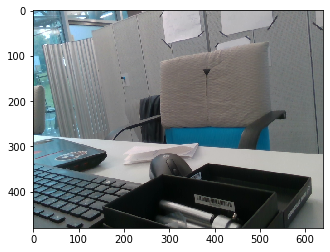

In [8]:
plt.imshow(img)

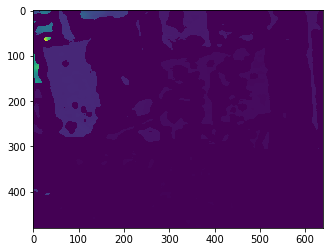

In [7]:
plt.imshow(d)

In [9]:
intrinsics = {
    "cx": cam._intrinsics.ppx,
    "cy": cam._intrinsics.ppy,
    "fx": cam._intrinsics.fx,
    "fy": cam._intrinsics.fy
}
print(intrinsics)

{'cx': 323.7543029785156, 'cy': 236.95787048339844, 'fx': 617.3400268554688, 'fy': 617.363037109375}


In [11]:
print('Shape of the depth image: ', np.shape(d))

shape of the depth image:  (480, 640)


In [12]:
print('Shape of the color image: ', np.shape(img))

Shape of the color image:  (480, 640, 3)


In [13]:
segmask = sampleClient.predictMask(d, **intrinsics)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
sampleClient.predictGQCNN_pj(img_bgr, d, **intrinsics)

In [ ]:
sampleClient.predictFCGQCNN_pj(img_bgr, d, segmask['masks'][0], **intrinsics)

In [3]:
cam.stop()

True